# The SHTOOLS Class Interface

SHTOOLS defines three major classes that simplify access to the underlying SHTOOLS functions:

* **SHCoeffs:** Spherical harmonics coefficients
* **SHGrid:** Gridded data on the sphere
* **SHWindows:** Multitaper windowing functions

The underlying data are stored in internal subclasses in different formats (e.g. `kind = 'real'` or `'complex'` and `grid = 'DH'` or `'GLQ'`).

In [1]:
%matplotlib inline
from __future__ import print_function # only necessary if using Python 2.x

import matplotlib.pyplot as plt
import numpy as np
from pyshtools.shclasses import SHCoeffs, SHGrid, SHWindow

## Plot a single spherical harmonic function

The spherical harmonics class `SHCoeffs` can be initialized directly from a numpy array that holds the spherical harmonic coefficient data. To initialize the coefficients to be zero except for the l=5, m=2 harmonic, we can write:

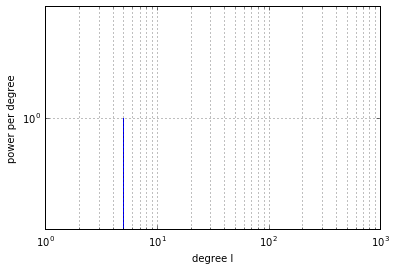

(<matplotlib.figure.Figure at 0x107ac6240>,
 <matplotlib.axes._subplots.AxesSubplot at 0x107ac6c88>)

In [2]:
# Spherical harmonic coefficients are stored as a numpy array of
# dimension (2, lmax+1, lmax+1). The first column corresponds to 
# the cosine [0], and sine [1] components, the second column
# corresponds to the spherical harmonic degree l, and the third
# column corresponds to the angular order m.
nl = 200
coeffs = np.zeros((2, nl, nl))
coeffs[0, 5, 2] = 1.

# Initialize the coefficient class. The default assumes 4-pi
# normalized coefficients, but the normalization convention
# can be specified by setting the optional parameters
# 'normalization' and 'csphase'. The normalization parameter
# can be either '4pi', 'ortho' or 'schmidt'. The Condon-Shortely
# phase is not used by default (1) but can be used by setting
# this equal to -1.
coeffs_l5m2 = SHCoeffs.from_array(coeffs)

coeffs_l5m2.plot_spectrum(xscale='log')

The coefficient class provides functions and methods that stay completely in coefficient space. To plot the function that corresponds to the coefficients, we need to expand it on a spatial grid (called DH2 in this case). The expand function returns a SHGrid class. The type and resolution of the grid is determined automatically to correspond to the maximum degree of the spherical harmonics coefficients to ensure good sampling.

The optional parameter 'grid' can either be 'DH2' for a Driscoll and Healy sampled grid with nlon = 2 * nlat, 'DH' for a Driscol and Healy sampled grid with nlon = nlat, and 'GLQ' for grids used with Gauss-Legendre quadrature.

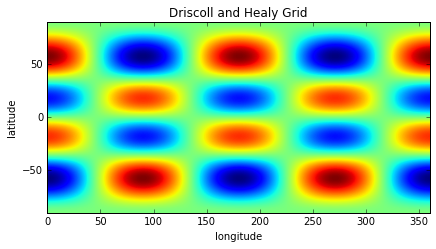

(<matplotlib.figure.Figure at 0x107d6ada0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1080d6358>)

In [3]:
grid_l5m2 = coeffs_l5m2.expand('DH2')

grid_l5m2.plot()

## Initialize with a random model

Another constructor for the SHCoeffs class is the .from_random method. It takes a power spectrum (power per degree l of the coefficients) and generates independent normal distributed random variables with this power per degree l. This corresponds to a stationary and isotropic random model on the spherical surface whose autocorrelation function is given by the spherical harmonics addition theorem.

We initialize coefficients here with a scale-free power spectrum that has equal band power beyond the scale length that defines the size of the largest model features. The particular property of this model is that it is invariant under zoom operations.

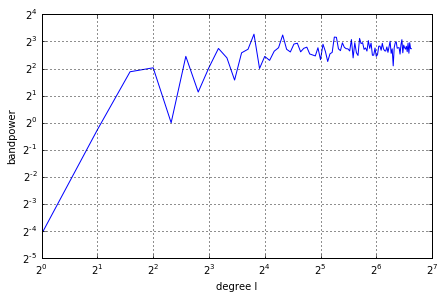

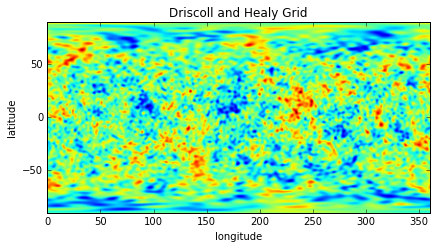

(<matplotlib.figure.Figure at 0x10a217828>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10a1aeb00>)

In [4]:
nl = 100  # l = [0, 199]
lmax = nl - 1
a = 10  # scale length
ls = np.arange(nl, dtype=np.float)
power = 1. / (1. + (ls / a) ** 2) ** 0.5

coeffs_global = SHCoeffs.from_random(power)
coeffs_global.plot_spectrum(unit='per_dlogl', xscale='log')

grid_global = coeffs_global.expand('DH2')
grid_global.plot()

## Rotating the coordindate system

Spherical harmonics coefficients can be expressed in a different coordinate system very efficiently. Importantly, the power per degree spectrum is invariant under rotation. While the degree l controls the wavevector magnitude, it is the order m that defines the orientation of the spherical harmonics. We demonstrate this by rotating a zonal spherical harmonic (m=0) that is centered around the north-pole to the equator.

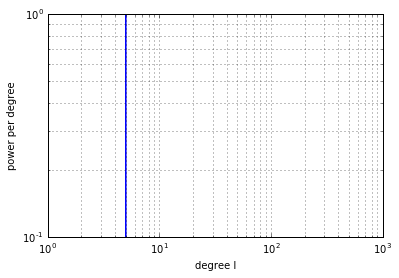

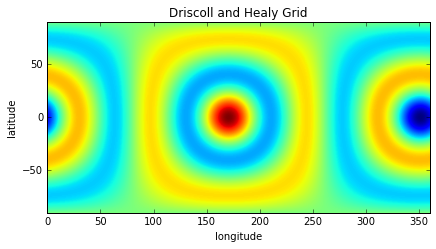

(<matplotlib.figure.Figure at 0x10e961b38>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10e967550>)

In [5]:
nl = 200
coeffs = np.zeros((2, nl, nl))
coeffs[0, 5, 0] = 1.
coeffs_l5m0 = SHCoeffs.from_array(coeffs)

# Rotations are specified by the three Euler angles alpha, beta, and gamma.
# There are several different convenctions for specifying these angles, 
# and they can either provide the angles for rotating the physical body
# or coordinate system. Please read the documentation of this method
# before proceeding!
alpha = 0.  # around z-axis
beta = 90.  # around x-axis (lon=0)
gamma = 10.  # around z-axis again

coeffs_l5m0_rot = coeffs_l5m0.rotate(alpha, beta, gamma, degrees=True)
fig, ax = coeffs_l5m0_rot.plot_spectrum(show=False)
ax.set(ylim=(1e-1, 1e0))

grid_l5m0_rot = coeffs_l5m0_rot.expand('DH2')
grid_l5m0_rot.plot()

## Addition, multiplication, and subtraction

Similar grids can be added, multiplied and subtracted using the standard python operators

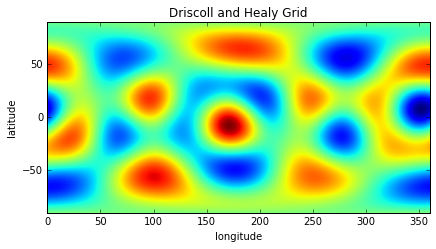

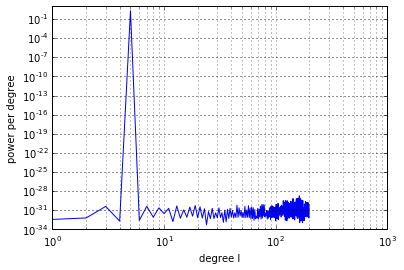

In [6]:
grid_new = grid_l5m0_rot + grid_l5m2
grid_new.plot()

coeffs = grid_new.expand()
coeffs.plot_spectrum();